# Instalation of Dataset

In [ ]:
!wget https://archive.ics.uci.edu/static/public/352/online+retail.zip

--2025-02-19 15:15:39--  https://archive.ics.uci.edu/static/public/352/online+retail.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘online+retail.zip.1’

online+retail.zip.1     [             <=>    ]  22.62M  8.37MB/s    in 2.7s    

2025-02-19 15:15:42 (8.37 MB/s) - ‘online+retail.zip.1’ saved [23715478]



In [ ]:
!unzip online+retail.zip

Archive:  online+retail.zip
 extracting: Online Retail.xlsx      


In [ ]:
!pip install openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 4.4 MB/s eta 0:00:00


# Data Loading

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
df1=pd.read_excel('Online Retail.xlsx',dtype={'InvoiceNo':'string','StockCode':'string','Description':'string','Country':'string'})
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  string        
 1   StockCode    541909 non-null  string        
 2   Description  540455 non-null  string        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  string        
dtypes: datetime64[ns](1), float64(2), int64(1), string(4)
memory usage: 33.1 MB


# Datacleaning

In [ ]:
df1.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [ ]:
df1[df1['Description'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,<NA>,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,<NA>,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,<NA>,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,<NA>,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,<NA>,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,<NA>,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,<NA>,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,<NA>,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,<NA>,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


In [ ]:
df1[df1['StockCode']==22139]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [ ]:
stock_items=df1[['StockCode','Description']].value_counts().reset_index()

In [ ]:
stock_items=stock_items.groupby('StockCode').head(1)
stock_items

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302
1,22423,REGENCY CAKESTAND 3 TIER,2200
2,85099B,JUMBO BAG RED RETROSPOT,2159
3,47566,PARTY BUNTING,1727
4,20725,LUNCH BAG RED RETROSPOT,1638
...,...,...,...
4784,35832,WOOLLY HAT SOCK GLOVE ADVENT STRING,1
4785,35833G,4 GOLD FLOCK CHRISTMAS BALLS,1
4788,21410,COUNTRY COTTAGE DOORSTOP GREEN,1
4789,21412,VINTAGE GOLD TINSEL REEL,1


In [ ]:
stock_items[stock_items['StockCode']=='85123A']

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302


In [ ]:
stock_items.rename(columns={'Description':'FreqDescription'},inplace=True)

In [ ]:
df2=df1.merge(stock_items,on='StockCode',how='left')

In [ ]:
df2

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,FreqDescription,count
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,2302.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,WHITE METAL LANTERN,328.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,CREAM CUPID HEARTS COAT HANGER,293.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,473.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,449.0
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,PACK OF 20 SPACEBOY NAPKINS,148.0
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,CHILDREN'S APRON DOLLY GIRL,320.0
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,CHILDRENS CUTLERY DOLLY GIRL,307.0
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,CHILDRENS CUTLERY CIRCUS PARADE,162.0


In [ ]:
df2['Description']=df2['FreqDescription']

In [ ]:
df2.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,112
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0
FreqDescription,112
count,112


In [ ]:
df2.drop(['FreqDescription','count'],axis=1,inplace=True)

# Removing Outliers

In [ ]:
df2.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [ ]:
df2=df2[(df2['Quantity']>0) & (df2['UnitPrice']>0)]

In [ ]:
df2.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,530060.000000,530060,530060.000000,397841.000000
mean,10.070379,2011-07-04 20:18:04.657510656,3.907871,15294.417126
min,1.000000,2010-12-01 08:26:00,0.001000,12347.000000
25%,1.000000,2011-03-28 12:22:00,1.250000,13969.000000
50%,3.000000,2011-07-20 12:58:00,2.080000,15159.000000
75%,10.000000,2011-10-19 12:39:00,4.130000,16795.000000
max,1488.000000,2011-12-09 12:50:00,13541.330000,18287.000000
std,31.304786,NaN,35.917161,1713.144667


In [ ]:
df2.Quantity.quantile(0.9999)

1439.8763999990188

In [ ]:
df2=df2[df2['Quantity']<1500]

In [ ]:
df2.shape

(530060, 8)

# Feature Engineering

In [ ]:
df2['TotalPrice']=df2['UnitPrice']*df2['Quantity']
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [ ]:
df2['month']=df2['InvoiceDate'].dt.month

In [ ]:
df2['Weekday']=df2['InvoiceDate'].dt.day_name()

In [ ]:
df2['Hour']=df2['InvoiceDate'].dt.hour

In [ ]:
df2.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,month,Weekday,Hour
474964,576857,22615,PACK OF 12 CIRCUS PARADE TISSUES,1,2011-11-16 15:52:00,0.39,12748.0,United Kingdom,0.39,11,Wednesday,15
32961,539212,84843,WHITE SOAP RACK WITH 2 BOTTLES,2,2010-12-16 12:20:00,5.95,17146.0,United Kingdom,11.90,12,Thursday,12
424493,573269,23322,LARGE WHITE HEART OF WICKER,1,2011-10-28 13:00:00,2.95,16764.0,United Kingdom,2.95,10,Friday,13
80097,543020,22629,SPACEBOY LUNCH BOX,2,2011-02-02 14:29:00,1.95,15005.0,United Kingdom,3.90,2,Wednesday,14
518257,580115,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2011-12-01 16:22:00,5.79,NaN,United Kingdom,5.79,12,Thursday,16


# Data Insights and trends

In [ ]:
monthly_sales=df2.groupby('month')['TotalPrice'].sum()

In [ ]:
monthly_sales

,TotalPrice
month,
1,599020.060
2,517004.650
3,717099.360
4,522894.341
5,765666.020
6,760810.650
7,719030.031
8,752954.380
9,1050843.092


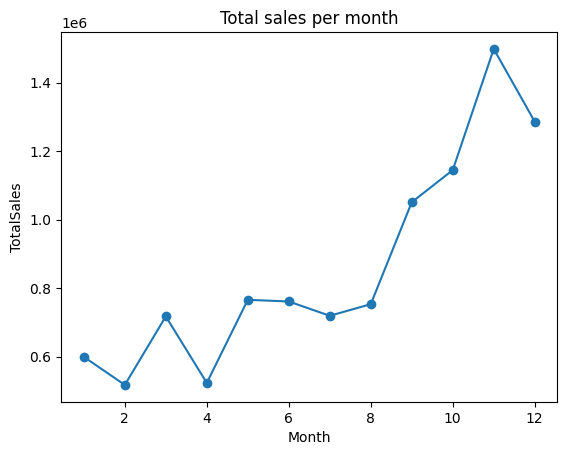

In [ ]:
plt.title('Total sales per month')
plt.plot(monthly_sales,marker='o')
plt.xlabel('Month')
plt.ylabel('TotalSales')
plt.show();

In [ ]:
weekly_sales=df2.groupby('Weekday')['TotalPrice'].sum().sort_values()

In [ ]:
weekly_sales

,TotalPrice
Weekday,
Sunday,812160.601
Friday,1661759.391
Monday,1758820.841
Wednesday,1849040.930
Tuesday,2070502.751
Thursday,2182649.160


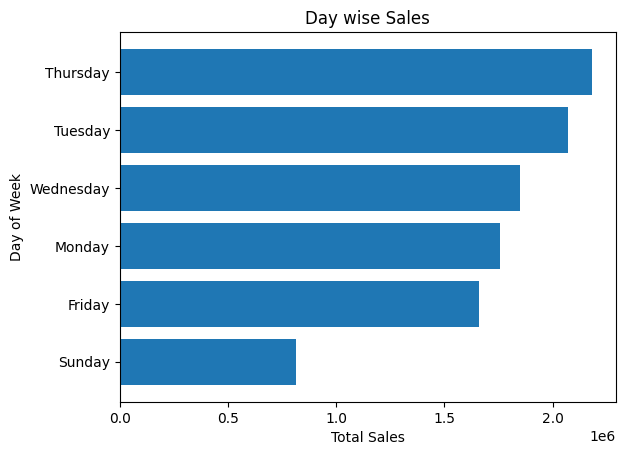

In [ ]:
plt.title('Day wise Sales')
plt.barh(weekly_sales.index,weekly_sales.values)
plt.xlabel('Total Sales')
plt.ylabel("Day of Week")
plt.show();

In [ ]:
peak_hour=df2.groupby('Hour')['TotalPrice'].sum().sort_values(ascending=False).head(5)

In [ ]:
peak_hour

,TotalPrice
Hour,
12,1419968.820
10,1358436.981
15,1346694.580
13,1245425.450
11,1230511.160


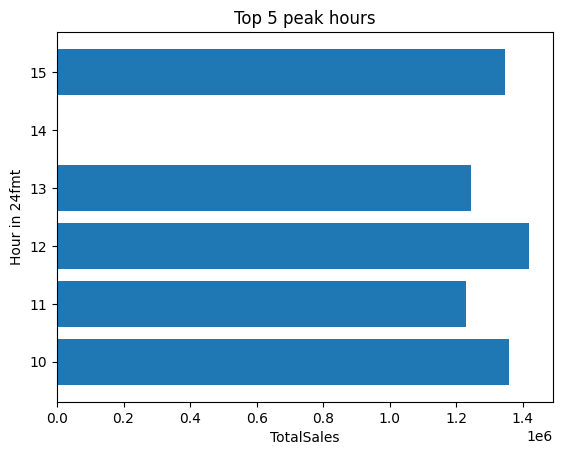

In [ ]:
plt.title("Top 5 peak hours")
plt.barh(peak_hour.index,peak_hour.values)
plt.xlabel('TotalSales')
plt.ylabel('Hour in 24fmt')
plt.show();

In [ ]:
top_prod=df2.groupby('StockCode')['TotalPrice'].sum().sort_values(ascending=False).head(5)

In [ ]:
top_prod

,TotalPrice
StockCode,
DOT,206248.77
22423,174484.74
47566,99504.33
85123A,94965.30
85099B,94340.05


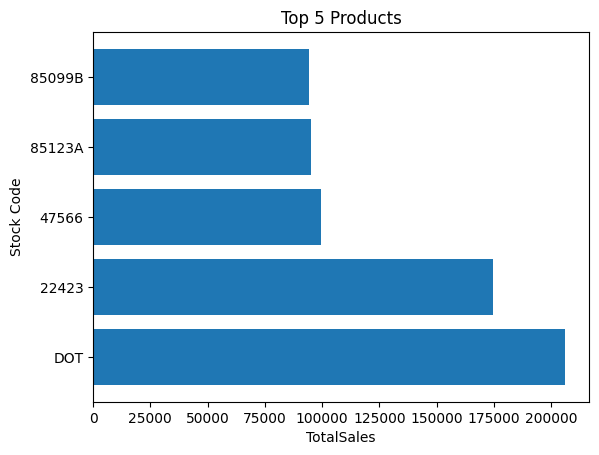

In [ ]:
plt.title('Top 5 Products')
plt.barh(top_prod.index,top_prod.values)
plt.xlabel('TotalSales')
plt.ylabel('Stock Code')
plt.show()

In [ ]:
country=df2.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(5)

In [ ]:
country

,TotalPrice
Country,
United Kingdom,8703358.974
EIRE,283453.960
Netherlands,279210.180
Germany,228867.140
France,209715.110


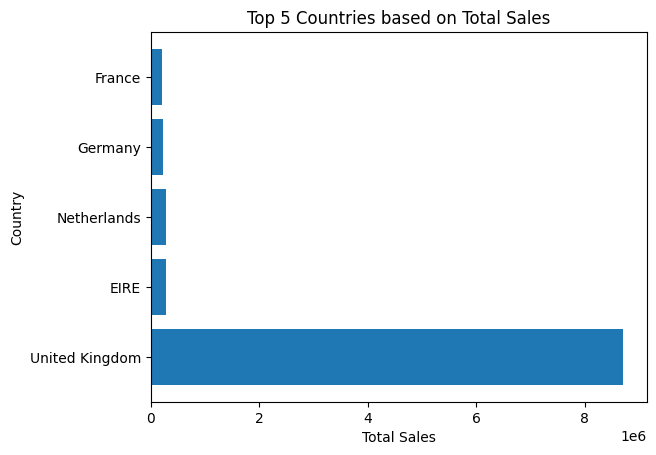

In [ ]:
plt.title('Top 5 Countries based on Total Sales')
plt.barh(country.index,country.values)
plt.xlabel('Total Sales')
plt.ylabel('Country')
plt.show();

# RFM Analysis

In [ ]:
df2.InvoiceDate.max()

Timestamp('2011-12-09 12:50:00')

In [168]:
from datetime import timedelta
current_date=df2.InvoiceDate.max()+timedelta(1)

In [169]:
current_date

Timestamp('2011-12-10 12:50:00')

In [171]:
rfm=df2.groupby('CustomerID').agg({
  'InvoiceDate':lambda x: (current_date-x.max()).days,
  'InvoiceNo':'count',
  'TotalPrice':'sum'
})

In [173]:
rfm.columns=['Receny','Frequency','Monetary']

In [178]:
rfm.head()

,Receny,Frequency,Monetary
CustomerID,,,
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40
12352.0,36,85,2506.04


In [185]:
rfm['R_Segment']=pd.qcut(rfm['Receny'],5,labels=[5,4,3,2,1])
rfm['F_Segment']=pd.qcut(rfm['Frequency'],5,labels=[1,2,3,4,5])
rfm['M_Segment']=pd.qcut(rfm['Monetary'],5,labels=[1,2,3,4,5])
rfm['RFM_Score']=rfm[['F_Segment','M_Segment','R_Segment']].sum(axis=1)

In [186]:
rfm.head()

,Receny,Frequency,Monetary,R_Segment,F_Segment,M_Segment,RFM_Score
CustomerID,,,,,,,
12347.0,2,182,4310.00,5,5,5,15
12348.0,75,31,1797.24,2,3,4,9
12349.0,19,73,1757.55,4,4,4,12
12350.0,310,17,334.40,1,2,2,5
12352.0,36,85,2506.04,3,4,5,12


In [187]:
# Customers with High RFM Score
rfm.sort_values('RFM_Score',ascending=False)

,Receny,Frequency,Monetary,R_Segment,F_Segment,M_Segment,RFM_Score
CustomerID,,,,,,,
15078.0,7,440,9743.11,5,5,5,15
18198.0,4,159,5425.56,5,5,5,15
15089.0,10,145,2420.84,5,5,5,15
12362.0,3,266,5226.23,5,5,5,15
12347.0,2,182,4310.00,5,5,5,15
...,...,...,...,...,...,...,...
15347.0,366,5,201.60,1,1,1,3
15350.0,373,5,115.65,1,1,1,3
17698.0,261,8,154.95,1,1,1,3


# Churn Analysis

In [190]:
customer_last_purchase=df2.groupby('CustomerID')['InvoiceDate'].max()
customer_last_purchase=(current_date-customer_last_purchase).dt.days

In [192]:
customer_last_purchase.sample(5)

,InvoiceDate
CustomerID,
17841.0,2
14924.0,246
17536.0,177
13158.0,95
15740.0,49


In [193]:
churn_thershold=120
churned_customers=customer_last_purchase[customer_last_purchase>churn_thershold]
churned_customers.head()

,InvoiceDate
CustomerID,
12350.0,310
12353.0,204
12354.0,232
12355.0,214
12361.0,287


In [194]:
print("Number of churned Customers : ",len(churned_customers))

Number of churned Customers :  1217


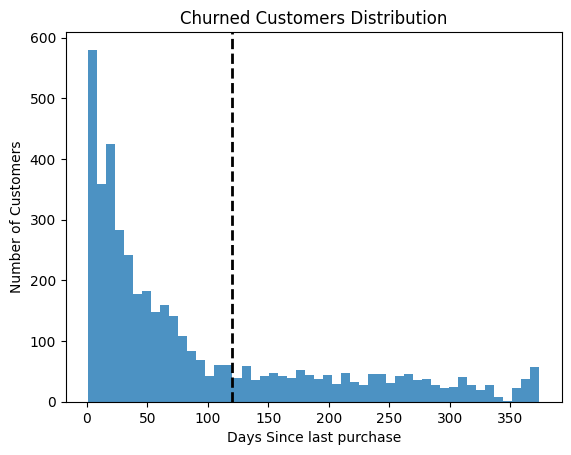

In [208]:
plt.title('Churned Customers Distribution')
plt.hist(customer_last_purchase,bins=50,alpha=0.8)
plt.axvline(churn_thershold, color='black',linestyle='dashed',linewidth=2)
plt.xlabel('Days Since last purchase')
plt.ylabel('Number of Customers')
plt.show()